In [1]:
inputs = []
NWKCs = []
Ms = []
ABs = []
CDs = []
for i in range(100):
    with open(f"../tools/in/{i:04}.txt") as f:
        NWKC = list(map(int, f.readline().split()))
        NWKCs.append(NWKC)
        M  = [list(map(int, f.readline().split())) for _ in range(200)]
        Ms.append(M)
        AB  = [list(map(int, f.readline().split())) for _ in range(NWKC[1])]
        ABs.append(AB)
        CD  = [list(map(int, f.readline().split())) for _ in range(NWKC[2])]
        CDs.append(CD)
        inputs.append((NWKC, M, AB, CD))

In [2]:
class UnionFind():
    def __init__(self, n):
        self.n = n
        self.parents = [-1] * n

    def find(self, x):
        if self.parents[x] < 0:
            return x
        else:
            self.parents[x] = self.find(self.parents[x])
            return self.parents[x]

    def union(self, x, y):
        x = self.find(x)
        y = self.find(y)

        if x == y:
            return

        if self.parents[x] > self.parents[y]:
            x, y = y, x

        self.parents[x] += self.parents[y]
        self.parents[y] = x

    def size(self, x):
        return -self.parents[self.find(x)]

    def members(self, x):
        root = self.find(x)
        return [i for i in range(self.n) if self.find(i) == root]

    def roots(self):
        return [i for i, x in enumerate(self.parents) if x < 0]

    def all_group_members(self):
        d = {root: [] for root in self.roots()}
        for i in range(self.n):
            d[self.find(i)].append(i)
        return d

    def __str__(self):
        return '\n'.join('{}: {}'.format(r, self.members(r)) for r in self.roots())

In [28]:
flgs  = []
thress = []
for cnt, (NWKC, M, AB, CD) in enumerate(inputs):
    for thres in [100*i for i in range(1, 51)]:
        N, W, K, C = NWKC
        is_ok = [[M[i][j]<=thres for j in range(200)] for i in range(200)]
        uf = UnionFind(N*N+2)
        for i in range(N):
            for j in range(N):
                for i_, j_ in [(i+1, j+0), (i+0, j+1), (i-1, j+0), (i+0, j-1)]:
                    if not (0<=i_<N and 0<=j_<N):
                        continue
                    if is_ok[i][j] and is_ok[i_][j_]:
                        uf.union(i*N+j, i_*N+j_)
        flg = True
        for c, d in CD:
            flg_ = False
            for a, b in AB:
                if uf.find(a*N+b)==uf.find(c*N+d):
                    flg_ = True
                    break
            if not flg_:
                flg = False
                break
        if flg:
            thress.append(thres)
            print(thres)
            break


600
500
1000
300
600
200
3000
500
200
500
1200
200
300
1900
900
400
200
500
700
400
300
200
800
500
200
500
200
700
200
700
1100
800
300
200
1900
500
400
500
800
300
300
200
200
200
1300
500
400
100
400
100
1000
100
200
700
400
400
800
200
300
300
300
800
100
2600
300
400
300
2900
600
200
400
1200
300
400
900
500
800
500
500
3100
200
400
1100
1100
800
200
200
1000
2100
400
1600
900
200
400
300
1100
400
300
600
1000
200
500
200
200
600
700
300
2000
200
1500
1500
200
300
800
800
200
300
400
600
600
600
300
1100
400
2800
500
300
500
800
300
300
200
200
800
100
400
300
400
500
600
3000
300
3900
2300
1400
100
100
1300
400
600
300
300
1400
300
200
1700
200
300
500
100
200
300
700
800
100
200
400
200
200
300
700
300
2400
300
200
300
300
200
500
600
700
800
600
200
600
300
300
1900
300
200
200
4000
4000
900
200
300
300
400
200
600
800
1300
3000
600
700
300
600
2800
200
300
1400
100
400
2800
800
500
1200
400
1500
700
700
300
400
1000
300
200
300
700
800
600
3100
500
500
1000
2900
400
200
200
70

In [3]:
import matplotlib.pyplot as plt 
plt.hist(thress, bins=50)

NameError: name 'thress' is not defined

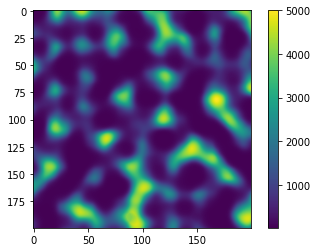

In [3]:
import matplotlib.pyplot as plt
plt.imshow(Ms[0])
plt.colorbar()


In [4]:
eles = []
for M in Ms:
    for l in M:
        for ele in l:
            eles.append(ele)



In [5]:
sum(eles)/len(eles)

779.136088

In [6]:
sum([ele for ele in eles if ele>777])/len([ele for ele in eles if ele>777])

2172.7176495211747

In [7]:
sum([ele for ele in eles if ele>2167])/len([ele for ele in eles if ele>2167])

3202.3585502123765

(array([1543615.,  381239.,  250571.,  185357.,  146219.,  120883.,
         101914.,   87271.,   76650.,   67486.,   61536.,   56325.,
          51657.,   47959.,   44631.,   42107.,   40060.,   37809.,
          36316.,   34413.,   33134.,   31940.,   31435.,   30484.,
          28994.,   29043.,   28354.,   27657.,   27091.,   25863.,
          25610.,   24651.,   23519.,   22555.,   21471.,   20470.,
          19308.,   17807.,   16459.,   15198.,   14157.,   12741.,
          11792.,   10597.,    9261.,    8134.,    6731.,    5173.,
           3793.,    2560.]),
 array([  10. ,  109.8,  209.6,  309.4,  409.2,  509. ,  608.8,  708.6,
         808.4,  908.2, 1008. , 1107.8, 1207.6, 1307.4, 1407.2, 1507. ,
        1606.8, 1706.6, 1806.4, 1906.2, 2006. , 2105.8, 2205.6, 2305.4,
        2405.2, 2505. , 2604.8, 2704.6, 2804.4, 2904.2, 3004. , 3103.8,
        3203.6, 3303.4, 3403.2, 3503. , 3602.8, 3702.6, 3802.4, 3902.2,
        4002. , 4101.8, 4201.6, 4301.4, 4401.2, 4501. , 4600.8, 47

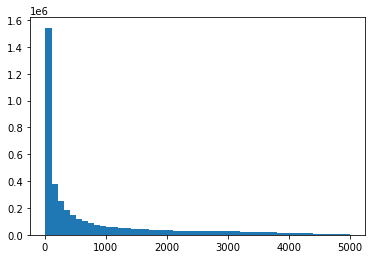

In [8]:
import matplotlib.pyplot as plt
plt.hist(eles, bins=50)

In [9]:
import math
sorted_eles = sorted(eles)
l=0
for i in range(10):
    print(sorted_eles[l+(len(sorted_eles)-l)//4], sorted_eles[l+(len(sorted_eles)-l)//2], sorted_eles[l+(len(sorted_eles)-l)*3//4])
    l = (len(sorted_eles)+l)//2


37 236 1069
503 1069 2272
1570 2272 3169
2696 3169 3755
3440 3755 4166
3943 4166 4447
4296 4447 4636
4535 4636 4769
4697 4769 4861
4812 4861 4921


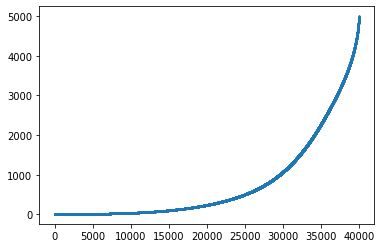

In [11]:
plt.scatter(range(len(sorted_eles[::100])), sorted_eles[::100], s=1)

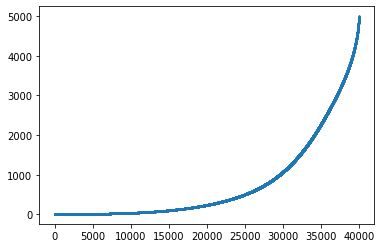

In [13]:
X, Y = [], []
for i, ele in enumerate(sorted_eles[::100]):
    X.append(i)
    Y.append(ele)
plt.scatter(X, Y, s=1)

In [12]:
bincnt = [102767,  28618,  20542,  15876,  13065,  11540,  10251,
          9321,   8574,   7574,   7280,   6464,   5864,   5500,
          5166,   4689,   4651,   4208,   3835,   3722,   3592,
          3302,   3233,   3181,   2980,   2969,   2712,   2764,
          2606,   2468,   2502,   2297,   2337,   2252,   2060,
          2052,   2110,   2028,   2009,   1887,   1985,   1842,
          1854,   1896,   1837,   1769,   1757,   1721,   1687,
          1617,   1625,   1741,   1648,   1575,   1574,   1615,
          1604,   1574,   1587,   1480,   1521,   1527,   1484,
          1459,   1465,   1416,   1372,   1376,   1337,   1281,
          1233,   1226,   1169,   1189,   1142,   1085,   1007,
           988,    940,    928,    871,    877,    865,    774,
           780,    715,    595,    612,    554,    519,    464,
           456,    366,    358,    296,    263,    225,    171,
           134,    124]

In [13]:
bincnt_cumsum = [0]
for cnt in bincnt:
    bincnt_cumsum.append(cnt+bincnt_cumsum[-1])

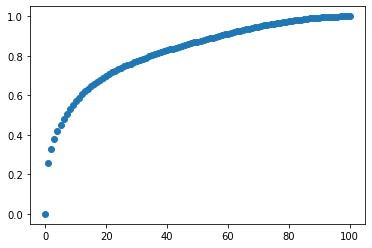

In [15]:
plt.scatter(range(len(bincnt_cumsum)), [x/bincnt_cumsum[-1] for x in bincnt_cumsum])

In [17]:
len(bincnt_cumsum), [x/bincnt_cumsum[-1] for x in bincnt_cumsum]

(101,
 [0.0,
  0.2569175,
  0.3284625,
  0.3798175,
  0.4195075,
  0.45217,
  0.48102,
  0.5066475,
  0.52995,
  0.551385,
  0.57032,
  0.58852,
  0.60468,
  0.61934,
  0.63309,
  0.646005,
  0.6577275,
  0.669355,
  0.679875,
  0.6894625,
  0.6987675,
  0.7077475,
  0.7160025,
  0.724085,
  0.7320375,
  0.7394875,
  0.74691,
  0.75369,
  0.7606,
  0.767115,
  0.773285,
  0.77954,
  0.7852825,
  0.791125,
  0.796755,
  0.801905,
  0.807035,
  0.81231,
  0.81738,
  0.8224025,
  0.82712,
  0.8320825,
  0.8366875,
  0.8413225,
  0.8460625,
  0.850655,
  0.8550775,
  0.85947,
  0.8637725,
  0.86799,
  0.8720325,
  0.876095,
  0.8804475,
  0.8845675,
  0.888505,
  0.89244,
  0.8964775,
  0.9004875,
  0.9044225,
  0.90839,
  0.91209,
  0.9158925,
  0.91971,
  0.92342,
  0.9270675,
  0.93073,
  0.93427,
  0.9377,
  0.94114,
  0.9444825,
  0.947685,
  0.9507675,
  0.9538325,
  0.956755,
  0.9597275,
  0.9625825,
  0.965295,
  0.9678125,
  0.9702825,
  0.9726325,
  0.9749525,
  0.97713,
  0.979